In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../Task 1/')
from efficient_apriori import apriori
from improved_apriori import Improved_Apriori
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
data = pd.read_csv('../Task 2/dataset/final_animedataset.csv')
data = data[['username', 'title']]
data = data.groupby('username')['title'].apply(list)
data = data.to_dict()

In [3]:
# Step 2: Frequent Itemset Generation
# Use the apriori algorithm to generate frequent itemsets
apriori = Improved_Apriori(data, min_support=0.4, min_confidence=1)
frequent_itemsets = apriori.apriori()
frequent_itemsets

100%|██████████| 78/78 [00:01<00:00, 54.95it/s]
0it [00:00, ?it/s]


{1: {('Angel Beats!',): 65303,
  ('Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.',): 49456,
  ('Another',): 51658,
  ('Ao no Exorcist',): 53028,
  ('Bakemonogatari',): 57273,
  ('Bleach',): 63861,
  ('Byousoku 5 Centimeter',): 47041,
  ('Clannad',): 63023,
  ('Clannad: After Story',): 50104,
  ('Code Geass: Hangyaku no Lelouch',): 71414,
  ('Code Geass: Hangyaku no Lelouch R2',): 58654,
  ('Cowboy Bebop',): 51706,
  ('Darker than Black: Kuro no Keiyakusha',): 51982,
  ('Death Note',): 85642,
  ('Durarara!!',): 59267,
  ('Elfen Lied',): 68075,
  ('Fairy Tail',): 53143,
  ('Fate/stay night',): 48914,
  ('Fullmetal Alchemist',): 61241,
  ('Fullmetal Alchemist: Brotherhood',): 67132,
  ('Highschool of the Dead',): 55774,
  ('Higurashi no Naku Koro ni',): 49684,
  ('K-On!',): 50388,
  ('Mahou Shoujo Madoka★Magica',): 48549,
  ('Mirai Nikki (TV)',): 57010,
  ('Naruto',): 66343,
  ('Naruto: Shippuuden',): 53626,
  ('Neon Genesis Evangelion',): 52984,
  ('No Game No Life',): 48171,


In [4]:
# Create a binary matrix
# Flatten the dictionary into a list of itemsets
from tqdm import tqdm
itemsets = [itemset for level in frequent_itemsets.values() for itemset in level.keys()]

# Transactions 
transactions = list(data.values())

binary_matrix = pd.DataFrame(0, index=range(len(transactions)), columns=itemsets)

# Fill in the binary matrix
for i, transaction in enumerate(tqdm(transactions)):
    for itemset in itemsets:
        if set(itemset).issubset(transaction):
            binary_matrix.at[i, itemset] = 1  # Use 'at' instead of 'loc' for scalar indexing

binary_matrix


100%|██████████| 116124/116124 [03:03<00:00, 631.29it/s]


,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
0,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,1,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,0,1,1
116122,1,1,1,0,0,0,0,1,1,1,...,0,1,1,0,1,0,0,0,0,0


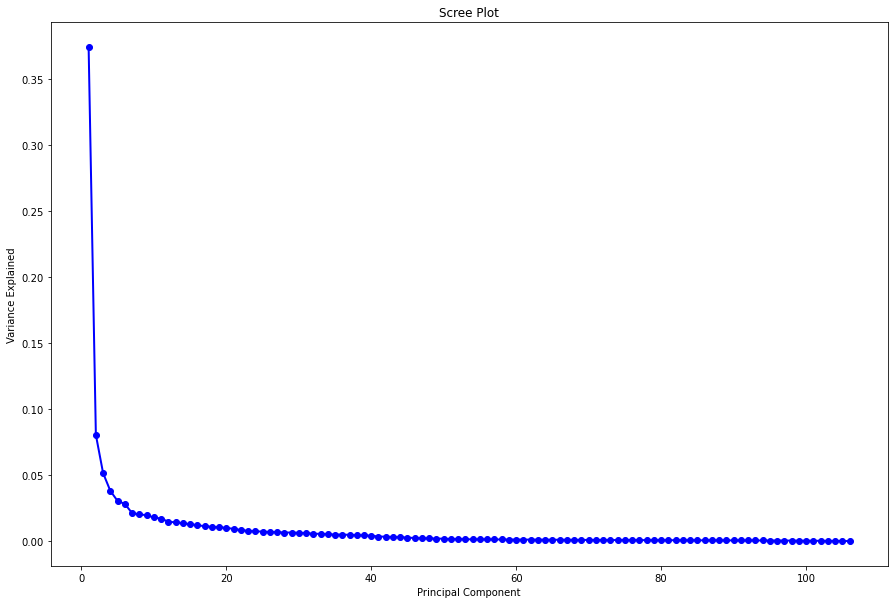

In [5]:
pca = PCA(random_state=24).fit(binary_matrix)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,10))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [6]:
pca = PCA(n_components=4, random_state=42)
transformed_data = pca.fit_transform(binary_matrix)

In [7]:
def kmeans_elbow_method(data, max_k=10, figsize=(15, 8)):
    ssd = []
    silhouette_scores = []
    plt.figure(figsize=figsize)
    # Loop through different values of k
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        
        # Fit the k-means clustering model to the data
        kmeans.fit(data)
        
        # Calculate the sum of squared distances
        ssd.append(kmeans.inertia_)
        
        # Calculate the average silhouette score
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Sum of squared distances', color='b')
    ax1.plot(range(2, max_k+1), ssd, 'bo-')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Silhouette score', color='r')
    ax2.plot(range(2, max_k+1), silhouette_scores, 'ro-')
    
    fig.tight_layout()
    plt.show()

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

<Figure size 1080x576 with 0 Axes>

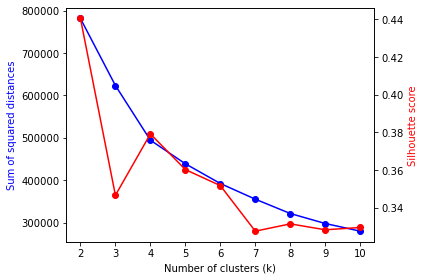

In [8]:
kmeans_elbow_method(transformed_data)

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


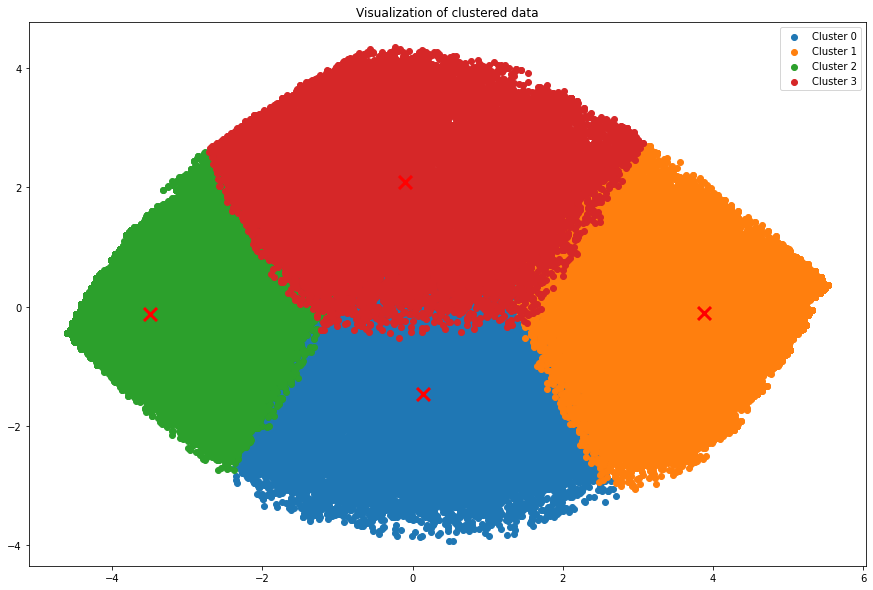

In [9]:
# Number of cluster for K-means to be 4 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(transformed_data)
cluster_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
#print(kmeans_centroids)
kmeans_silhouette = silhouette_score(transformed_data, cluster_labels)
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_data[cluster_labels == i, 0], transformed_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids

plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered data')
plt.show()

In [10]:
binary_matrix['kmeans_cluster'] = cluster_labels

In [11]:
# Interpreting the itemset frequencies in each cluster
cluster_itemset_frequencies = binary_matrix.groupby('kmeans_cluster').sum()
cluster_itemset_frequencies

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,18229,13800,14748,13401,13639,9270,10161,14190,11256,9973,...,8008,14268,17424,14008,14552,14737,3597,2906,2866,12583
1,32368,26881,27939,27787,28820,26157,22657,29237,25280,34457,...,22878,31009,31591,29097,31010,29161,30500,29177,32060,31391
2,7519,4618,5047,5459,5992,12415,5816,8748,5807,7893,...,7290,1861,3496,1935,1716,2640,1743,1107,472,1229
3,7187,4157,3924,6381,8822,16019,8407,10848,7761,19091,...,12246,2638,2570,2243,1808,2045,15260,13424,12251,2474


In [12]:
binary_matrix

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)",kmeans_cluster
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,3
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
116122,1,1,1,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,0


In [13]:
import ast
binary_matrix['anime_level'] = binary_matrix.apply(lambda row: max([len(col) for col, val in row.items() if val == 1 and col != 'kmeans_cluster' and col!='anime_level'], default=0), axis=1)
binary_matrix


,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)",kmeans_cluster,anime_level
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,3,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,0,0,0,1,0,3
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,2,2
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,3,3
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,3
116122,1,1,1,0,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,2


In [14]:
cluster_anime_level_counts = binary_matrix.groupby(['kmeans_cluster', 'anime_level']).size()
cluster_anime_level_counts

kmeans_cluster  anime_level
0               2               8666
                3              13955
1               2                201
                3              34418
2               0               2705
                1               7606
                2              24790
                3               3698
3               2               1900
                3              18185
dtype: int64

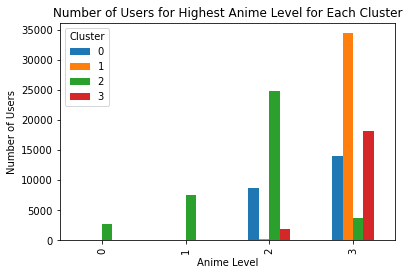

In [15]:
df_counts = cluster_anime_level_counts.reset_index(name='counts')

df_pivot = df_counts.pivot(index='anime_level', columns='kmeans_cluster', values='counts')

# Replace NaN values with 0
df_pivot.fillna(0, inplace=True)

# Create a bar plot
df_pivot.plot.bar()

# Add labels and title
plt.xlabel('Anime Level')
plt.ylabel('Number of Users')
plt.title('Number of Users for Highest Anime Level for Each Cluster')
plt.legend(title='Cluster')

# Show the plot
plt.show()

In [16]:
from sklearn import metrics

def evaluate_clustering(labels, data):
    # Calculate Silhouette score
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

    return silhouette_score, davies_bouldin_index, calinski_harabasz_index


Kmeans_silhouette, Kmeans_davies_bouldin, Kmeans_calinski_harabasz = evaluate_clustering(kmeans.labels_, transformed_data)

print(f'Kmeans Silhouette score: {Kmeans_silhouette}')
print(f'Kmeans Davies-Bouldin Index: {Kmeans_davies_bouldin}')
print(f'Kmeans Calinski-Harabasz Index: {Kmeans_calinski_harabasz}')

Kmeans Silhouette score: 0.37917517536645523
Kmeans Davies-Bouldin Index: 1.1523706653033399
Kmeans Calinski-Harabasz Index: 89572.1386892111


In [17]:
transformed_data

array([[-1.62098721,  2.70226962,  1.09343682, -0.23469054],
       [-4.37206366, -0.05027264, -0.35899706, -0.08055043],
       [-4.5092035 , -0.51439146,  0.12090971, -0.34060359],
       ...,
       [ 4.35737072, -0.66397832, -0.70759601,  0.28941675],
       [-1.4225346 , -1.63816712,  0.78534827, -1.01038425],
       [ 0.93557221,  3.15447906, -0.68793987,  0.027119  ]])

In [18]:
# Normalize just with frequency
def normalize_frequent_itemsets(binary_matrix, itemset_frequencies):
    
    normalized_matrix = binary_matrix.drop(columns=['kmeans_cluster', 'anime_level']).copy()

    for column in normalized_matrix.columns:
        # Find the level of the itemset (number of items in the itemset)
        level = len(column)

        # Get the frequency of the itemset from the dictionary
        frequency = itemset_frequencies[level][column]

        # Normalize the column by the itemset frequency
        normalized_matrix[column] = normalized_matrix[column] / frequency

    return normalized_matrix

#  A TF-IDF kindda method 
def tf_idf_normalize(binary_matrix,itemset_frequencies):

    TF_IDF_matrix = binary_matrix.drop(columns=['kmeans_cluster', 'anime_level']).copy()
    # For each column in the binary matrix
    for column in TF_IDF_matrix.columns:
        level = len(column)

        # Get the frequency of the itemset from the dictionary
        frequency = itemset_frequencies[level][column]

        # Calculate IDF
        IDF = np.log(len(TF_IDF_matrix)/frequency)
        TF_IDF_matrix[column] = TF_IDF_matrix[column] * IDF


    return TF_IDF_matrix

In [20]:
normalized_matrix = normalize_frequent_itemsets(binary_matrix, frequent_itemsets)
normalized_matrix

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000016,0.00000,0.000014,...,0.00002,0.00000,0.000000,0.000000,0.00000,0.000000,0.00002,0.000021,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000015,0.00000,0.000019,0.000019,0.000017,0.000000,0.000000,0.000016,0.00000,0.000000,...,0.00002,0.00002,0.000018,0.000021,0.00002,0.000021,0.00000,0.000000,0.000000,0.000021
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000016,0.000021,0.000000,0.00000,0.000000,...,0.00002,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0.000000,0.00000,0.000000,0.000000,0.000000,0.000016,0.000021,0.000016,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
116120,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.00000,0.000014,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00002,0.000021,0.000000,0.000000
116121,0.000015,0.00002,0.000019,0.000019,0.000017,0.000016,0.000000,0.000016,0.00002,0.000014,...,0.00002,0.00002,0.000018,0.000021,0.00002,0.000021,0.00002,0.000000,0.000021,0.000021
116122,0.000015,0.00002,0.000019,0.000000,0.000000,0.000000,0.000000,0.000016,0.00002,0.000014,...,0.00000,0.00002,0.000018,0.000000,0.00002,0.000000,0.00000,0.000000,0.000000,0.000000


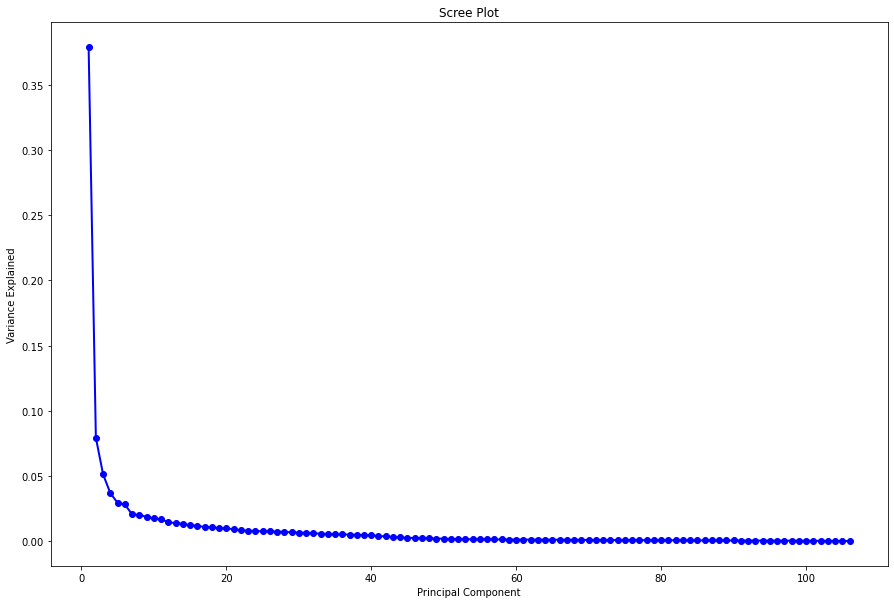

In [21]:
pca = PCA(random_state=24).fit(normalized_matrix)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,10))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [22]:
pca = PCA(n_components=4, random_state=42)
transformed_normalized_data = pca.fit_transform(normalized_matrix)

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

<Figure size 1080x576 with 0 Axes>

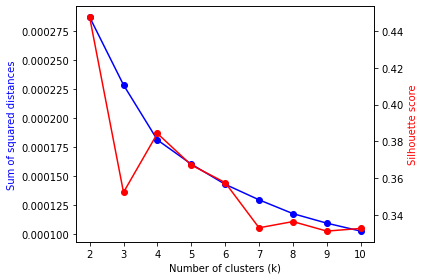

In [23]:
kmeans_elbow_method(transformed_normalized_data)

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


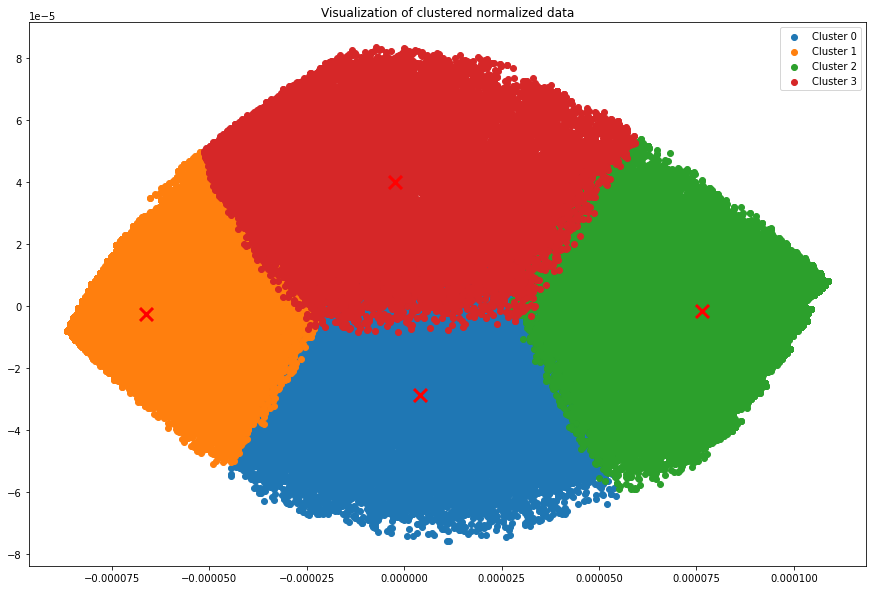

In [24]:
# Number of cluster for K-means to be 4 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(transformed_normalized_data)
cluster_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
#print(kmeans_centroids)
kmeans_silhouette = silhouette_score(transformed_normalized_data, cluster_labels)
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_normalized_data[cluster_labels == i, 0], transformed_normalized_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered normalized data')
plt.show()

In [25]:
Kmeans_Normalized_silhouette, Kmeans_Normalized_davies_bouldin, Kmeans_Normalized_calinski_harabasz = evaluate_clustering(kmeans.labels_, transformed_normalized_data)

print(f'Kmeans Normalized Silhouette score: {Kmeans_Normalized_silhouette}')
print(f'Kmeans Normalized Davies-Bouldin Index: {Kmeans_Normalized_davies_bouldin}')
print(f'Kmeans Normalized Calinski-Harabasz Index: {Kmeans_Normalized_calinski_harabasz}')

Kmeans Normalized Silhouette score: 0.3842889987102743
Kmeans Normalized Davies-Bouldin Index: 1.1466148111099699
Kmeans Normalized Calinski-Harabasz Index: 91717.73445039341


In [26]:
TF_IDF_matrix = tf_idf_normalize(binary_matrix, frequent_itemsets)
TF_IDF_matrix

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.903639,0.611159,0.000000,0.486165,...,0.834231,0.000000,0.000000,0.000000,0.000000,0.000000,0.820874,0.912758,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.575621,0.000000,0.810014,0.783839,0.706829,0.00000,0.000000,0.611159,0.000000,0.000000,...,0.834231,0.847126,0.745854,0.898508,0.861085,0.871385,0.000000,0.000000,0.000000,0.890209
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.59795,0.903639,0.000000,0.000000,0.000000,...,0.834231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0.000000,0.000000,0.000000,0.000000,0.000000,0.59795,0.903639,0.611159,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
116120,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.903639,0.000000,0.000000,0.486165,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.820874,0.912758,0.000000,0.000000
116121,0.575621,0.853575,0.810014,0.783839,0.706829,0.59795,0.000000,0.611159,0.840558,0.486165,...,0.834231,0.847126,0.745854,0.898508,0.861085,0.871385,0.820874,0.000000,0.890797,0.890209
116122,0.575621,0.853575,0.810014,0.000000,0.000000,0.00000,0.000000,0.611159,0.840558,0.486165,...,0.000000,0.847126,0.745854,0.000000,0.861085,0.000000,0.000000,0.000000,0.000000,0.000000


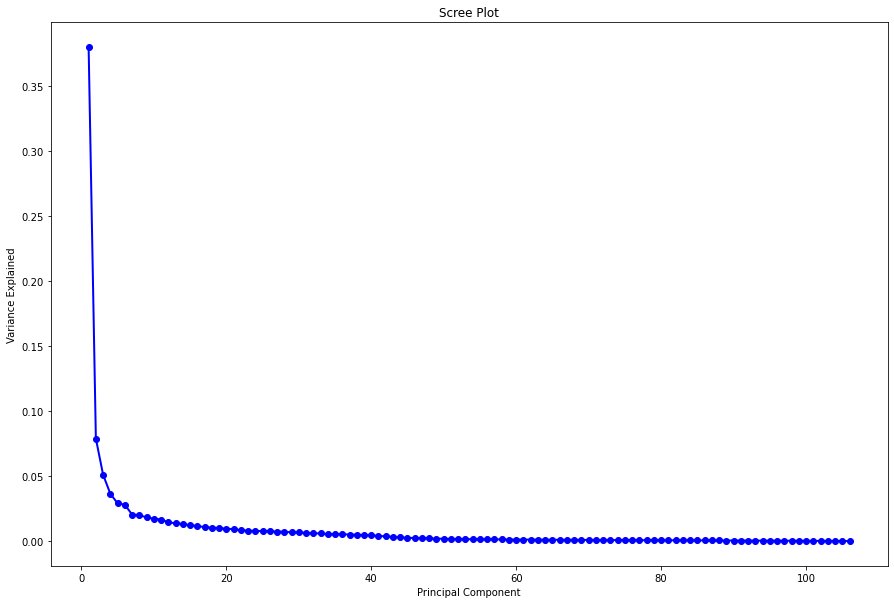

In [27]:
pca = PCA(random_state=24).fit(TF_IDF_matrix)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,10))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [28]:
pca = PCA(n_components=4, random_state=42)
transformed_TF_IDF_data = pca.fit_transform(TF_IDF_matrix)

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

<Figure size 1080x576 with 0 Axes>

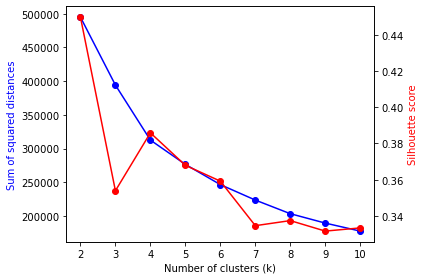

In [29]:
kmeans_elbow_method(transformed_TF_IDF_data)

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


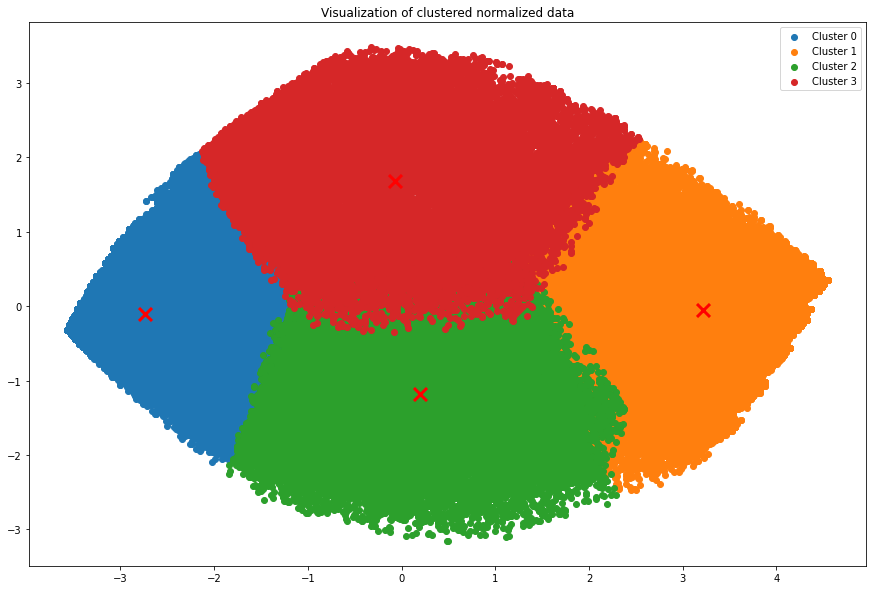

In [30]:
# Number of cluster for K-means to be 4 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(transformed_TF_IDF_data)
cluster_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
#print(kmeans_centroids)
kmeans_silhouette = silhouette_score(transformed_TF_IDF_data, cluster_labels)
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_TF_IDF_data[cluster_labels == i, 0], transformed_TF_IDF_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered TF-IDF normalized data')
plt.show()

In [31]:
Kmeans_TF_IDF_silhouette, Kmeans_TF_IDF_davies_bouldin, Kmeans_TF_IDF_calinski_harabasz = evaluate_clustering(kmeans.labels_, transformed_TF_IDF_data)

print(f'Kmeans TFIDF Silhouette score: {Kmeans_TF_IDF_silhouette}')
print(f'Kmeans TFIDF Davies-Bouldin Index: {Kmeans_TF_IDF_davies_bouldin}')
print(f'Kmeans TFIDF Calinski-Harabasz Index: {Kmeans_TF_IDF_calinski_harabasz}')

Kmeans TFIDF Silhouette score: 0.38588416198900577
Kmeans TFIDF Davies-Bouldin Index: 1.1454232480712951
Kmeans TFIDF Calinski-Harabasz Index: 92304.34411564766
